# Chapter 5: Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [61]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [62]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

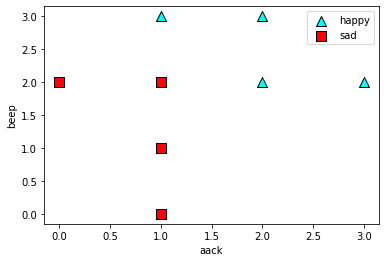

In [63]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

In [64]:
features.shape

(8, 2)

### Problem 1
#### a) How many data points are there? What is represented by the *x-* and *y-* coordinates in the scatter plot?

There are 8 data points.

The appearances of "aack" and "beep" in a sentence spoken by the aliens are represented by the *x-* and *y-* coordinates in the scatter plot respectively.

### Problem 1
#### b) In the *labels* array, what is represented by a 0? What is represented by a 1?

Referring to the mood of the aliens who said the sentence, being sad is represented by a 0 and being happy is represented by a 1.

### Coding the perceptron trick

In [65]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [66]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [67]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [68]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [69]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.02)

### Running the perceptron algorithm

In [70]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

### Problem 2
#### a) What initial weight is given to the number of ‘aacks’ and to the number of ‘beeps’? What is the initial bias?

Initial weight 1.0 is given to the number of "aack" and the same initial weight 1.0 is given to the number of "beep".

The initial bias is 0.0.

### Problem 2
#### b) What learning rate is used? Explain how learning rate affects the algorithm.

Learning rate of 0.01 is used. 

Learning rate affects the algorithm. In our perceptron trick, learning rate controls the changes made to the weights and the bias. Learning rate should be a small number, to make sure that the model only changes a small amount by each run of the training. If a large learning rate is used, the results will be jumping and will not be easy to settle down to an optimal solution.

### Problem 2
#### c) Explain what an epoch is. How many epochs are used in training?

An epoch is a complete execution of the algorithm, that means, the training data will pass and be trained. The number of times we run the algorithm is the epoch number.

200 epochs are used in training.

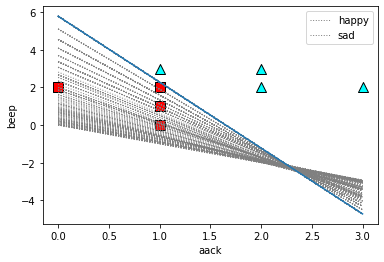

([0.6299999999999997, 0.17999999999999938], -1.0400000000000007)

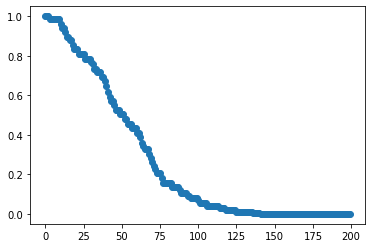

In [71]:
perceptron_algorithm(features, labels)

### Problem 2
#### d) After training, what values are assigned to the ‘aacks’ weight, ‘beeps’ weight and the bias?

The "aack" weight is 0.63.
The "beep" weight is 0.18.
The bias is -1.04.

### Problem 2
#### e) What percentage of points have the correct prediction?

100% of points have the correct prediction.

From the plots utils.draw_line(weights[0], weights[1], bias) and utils.plot_points(features, labels), we can see that the line is successfully dividing the happy and sad data points. 

From the plot plt.scatter(range(epochs), errors), we can see the error is no longer reducing after 140 epochs. It means that all the data points are correctly classified. 

### Problem 2
#### f) From the plot of error vs. epoch, could less epochs have been used to achieve similar performance? Would more training have made a significant improvement?

From the plot of error vs. epoch, less epochs could have been used to achieve similar performamce. As the plotted line became flat around 140 epochs, it means that the error is not reduced by training after 140 epochs.

More training would not have made a significant improvement because the error will not continue to reduce. After a certain number of training, the error will no longer diminish. 

### Problem 2
#### g) Explain the meaning of stochastic, mini-batch and batch gradient descent.

Batch gradient descent means that we use the entrie dataset in an epoch to train a model. It sums the error for each point in a training data set, updates the model only after all training data points have been used. 

Stochastic gradient descent means that we use one data point at a time in an epoch to train a model. It evaluates the error for one point within a training data set, update the model after this data point is used. 

Mini-batch gradient descent means that we use one mini-batch at a time in an epoch to train a model. We split our whole dataset into many mini-batches. It sums the error for each mini-batch and update the model after one mini-batch is used. Mini-batch gradient descent is a combined concepts of Batch gradient descent and Stochastic gradient descent. 




### The perceptron algorithm using Turi Create

In [72]:
import turicreate as tc

In [73]:
datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
data = tc.SFrame(datadict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [74]:
perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.003313     | 1.000000          |

| 2         | 3        | 0.005879     | 1.000000          |

| 3         | 4        | 0.007516     | 1.000000          |

| 4         | 5        | 0.009055     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [75]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502


### Problem 3
#### a) After training, what values are assigned to the ‘aacks’ weight, ‘beeps’ weight and the bias? Are these values different or the same as those found in the “Running the perceptron algorithm” section?

After training, the values assigned to the "aack" weight, "beep" weight and the bias are 2.972553703911967, 2.498635186535742 and -8.959708265685022 respectively.

These values are different from those found in the "Running the perceptron algorithm" section.


### Problem 3
#### b) What percentage of points have the correct prediction? How does this compare with the results of the “Running the perceptron algorithm” section?

As the prediction is same as label for all data point and the training accuracy is 1, 100% of points have the correct prediction. 

This is the same as with the results of the "Running the perceptron algorithm" section.

### Problem 3
#### c) Is there only a single choice of weights and bias that gets the predictions correct, or are there other choices of weights and bias that would achieve the same accuracy? Explain.

There is not only a single choice of weights and bias. There are other choices of weights and bias that would achieve the same accuracy. The step-by-step perceptron trick and the turicreate package both provide a 100% correct prediction yet the weights and bias are of different values. In a classification problem, it is possible that we can successful classify all the points correctly with two different sets of weights and bias. If we check the plots, we can see that the line used to divide happy and sad is not confined to one location. There is a range of the location for the line while all the lines are able to divide happy and sad successfully.